# Probabilidad que un evento caiga en un bin

Comparo la probabilidad exacta con la aproximada

In [1]:
%matplotlib notebook

In [2]:
pip install boost-histogram

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import boost_histogram as bh

Parámetros del histograma

In [4]:
xmin, xmax = -5, 5
nbins = 5

<IPython.core.display.Javascript object>


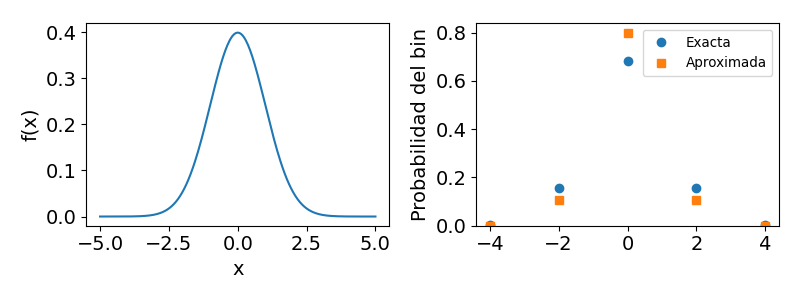

Text(0, 0.5, 'Probabilidad del bin')

In [5]:
fig = plt.figure(figsize=(8,3))
ax1, ax2 = fig.subplots(1,2)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_xlabel('x')
ax2.set_ylabel('Probabilidad del bin')

PDF N(0,1) 

In [6]:
x = np.linspace(xmin, xmax, 256)
ax1.plot(x, norm.pdf(x), label='N(0,1)')

Histograma 

In [7]:
hist = bh.Histogram(bh.axis.Regular(bins=nbins, start=xmin, stop=xmax))
xbin = hist.axes.centers[0]
bin_edges = hist.axes.edges[0]

Probabilidad exacta

In [8]:
cum_proba = norm.cdf(bin_edges)
pbin1 = cum_proba[1:] - cum_proba[:-1]
ax2.plot(xbin, pbin1, 'o', drawstyle='steps-mid', label='Exacta')

Probabilidad aproximada

In [9]:
bin_width = hist.axes[0].widths[0]
pbin2 = norm.pdf(xbin)*bin_width
ax2.plot(xbin, pbin2, 's', drawstyle='steps-mid', label='Aproximada')

In [10]:
ax2.set_ylim(bottom=0)
ax2.legend()


In [11]:
plt.savefig('histo1.svg')